In [1]:
import math
import numpy as np
import os
import pandas as pd

from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score,roc_auc_score


from sklearn.model_selection import cross_val_score

from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import VotingClassifier

from sklearn.decomposition import PCA

In [2]:
def get_lines_from_file(filename):
    f=open(filename)
    lines=[x.strip() for x in f]
    f.close()
    return lines

In [3]:
rgbWords  = ['yellow','blue','purple', 'orange','red','green']
shapeWords  = ['cylinder','cube', 'triangle','triangular','rectangular']
objWords = ['cylinder', 'apple','carrot', 'lime','lemon','orange', 'banana','cube', 'triangle', 'corn','cucumber', 'half', 'cabbage', 'ear', 'tomato', 'potato', 'cob','eggplant']

In [4]:
def get_deviations(filename,words):
    lines=get_lines_from_file("/Users/adithyabandi/_True_True_90_25_rgb_0_min_max.txt")
    tokens=[]
    mins=[]
    maxs=[]
    reqmins=[]
    reqmaxs=[]
    for line in lines:
        temp=line.split("_")
        tokens.append(temp[1])
        mins.append(temp[3])
        maxs.append(temp[5])
    for i in range(len(tokens)):
        if tokens[i] in words:
            reqmins.append(mins[i])
            reqmaxs.append(maxs[i])
    return reqmins,reqmaxs    

In [5]:
def get_report(filename):
    lines=get_lines_from_file(filename)
    j=0
    types=[]
    estops=[]
    sorts=[]
    pre_thres=[]
    rec_thres=[]
    split=[]
    acc=[]
    pre=[]
    rec=[]
    f1=[]
    min_means=[]
    min_medians=[]
    min_std_devs=[]
    max_means=[]
    max_medians=[]
    max_std_devs=[]
    i=0
    while i<len(lines):
        mins_agg=[]
        maxs_agg=[]
        for counter in range(4):
            if(lines[i]=="done"):
                i+=1
                break
            mins_str=lines[i].split("]")[0].split("[")[1].split(",")
            mins=[float(per_min) for per_min in mins_str]
            for mini in mins:
                mins_agg.append(mini)
            i+=1
            maxs_str=lines[i].split("]")[0].split("[")[1].split(",")
            maxs=[float(per_max) for per_max in maxs_str]
            for maxi in maxs:
                maxs_agg.append(maxi)
            i+=1
            g=lines[i]
            temp=g.split("-")
            sorts.append(temp[0])
            types.append(temp[1])
            estops.append(temp[2])
            pre_thres.append(temp[3])
            rec_thres.append(temp[4])
            split.append(temp[5])
            i+=2
            acc.append(float(lines[i])*100)
            i+=1
            f1.append(float(lines[i])*100)
            i+=1
            pre.append(float(lines[i])*100)
            i+=1
            rec.append(float(lines[i])*100)
            i+=2
            j+=1
        for counter in range(4):
            min_means.append(np.mean(mins_agg))
            min_medians.append(np.median(mins_agg))
            min_std_devs.append(np.std(mins_agg))
            max_means.append(np.mean(maxs_agg))
            max_medians.append(np.median(maxs_agg))
            max_std_devs.append(np.std(maxs_agg))
        
    Results=pd.DataFrame({'type':types,'early_stop':estops,
                      'pre_threshold':pre_thres,
                       'rec_threshold':rec_thres,'instances_sorted':sorts,
                          'precision':pre,'recall':rec,
                        'f1_score':f1,
                       'split':split,'accuracy':acc,#})
                       "mean_min_dissim_":min_means,"median_min_dissim_":min_medians,
                        "std_dev_min_dissim_":min_std_devs,
                        "mean_max_dissim_":max_means,
                        "median_max_dissim_":max_medians,
                        "std_dev_max_dissim_":max_std_devs})
    return Results

In [6]:
Results=get_report("/Users/adithyabandi/TM2_AllExecutionI.csv")
#Results

In [7]:
Results=Results[['instances_sorted','early_stop','type','split','pre_threshold', 'rec_threshold', 
                'f1_score','precision','recall','accuracy','mean_max_dissim_', 'mean_min_dissim_', 
                'median_max_dissim_','median_min_dissim_','std_dev_max_dissim_', 'std_dev_min_dissim_']]

In [8]:
#Results.groupby(["instances_sorted",'early_stop','type','pre_threshold','rec_threshold']).mean().sort_values(by=["f1_score"],ascending=False)

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
def display_results(Results,feature_type,early_stop,instance_sort):
    object_Results=Results[Results.type==feature_type]
    object_Results=object_Results[object_Results.early_stop==early_stop]
    object_Results=object_Results[object_Results.instances_sorted==instance_sort]
    object_Results_grouped=object_Results.groupby(["instances_sorted",'early_stop','type','pre_threshold','rec_threshold'])
    display(pd.DataFrame(object_Results_grouped.mean().reset_index()).sort_values(by=["f1_score"],ascending=False))
    object_Results_grouped_df=object_Results_grouped.aggregate(np.mean)
    object_Results_grouped_df=object_Results_grouped_df.reset_index()
    data_pivoted = object_Results_grouped_df[(object_Results_grouped_df.early_stop==early_stop) & (object_Results_grouped_df.instances_sorted==instance_sort)].pivot("pre_threshold", "rec_threshold", "f1_score")
    ax = sns.heatmap(data_pivoted)
    plt.show()

With instances sorted as True
With Early Stop set as True
rgb results:


,instances_sorted,early_stop,type,pre_threshold,rec_threshold,f1_score,precision,recall,accuracy,mean_max_dissim_,mean_min_dissim_,median_max_dissim_,median_min_dissim_,std_dev_max_dissim_,std_dev_min_dissim_
9,True,True,rgb,75,50,92.049603,89.875000,98.194444,92.583333,88.115495,13.490141,88.624766,5.731968,1.211540,17.096344
10,True,True,rgb,75,75,91.063492,88.062500,98.194444,91.083333,88.115495,16.185511,88.624766,5.731968,1.211540,22.614324
4,True,True,rgb,50,25,90.948413,89.201389,96.944444,91.652778,88.115495,9.015672,88.624766,5.731968,1.211540,11.627052
1,True,True,rgb,25,50,90.935516,87.895833,98.055556,91.541667,88.115495,9.015672,88.624766,5.731968,1.211540,11.627052
2,True,True,rgb,25,75,90.500992,87.520833,97.708333,91.041667,88.115495,14.402537,88.624766,5.731968,1.211540,21.954650
8,True,True,rgb,75,25,90.408730,87.888889,97.361111,91.090278,88.115495,13.490141,88.624766,5.731968,1.211540,17.096344
0,True,True,rgb,25,25,90.128968,88.569444,96.250000,90.097222,88.115495,9.015672,88.624766,5.731968,1.211540,11.627052
6,True,True,rgb,50,75,89.578373,87.923611,96.597222,89.798611,88.115495,14.402537,88.624766,5.731968,1.211540,21.954650
13,True,True,rgb,90,50,89.428571,86.013889,97.430556,90.111111,88.115495,38.746208,88.624766,25.203109,1.211540,35.283754
12,True,True,rgb,90,25,88.218254,83.479167,98.680556,88.993056,88.115495,38.746208,88.624766,25.203109,1.211540,35.283754


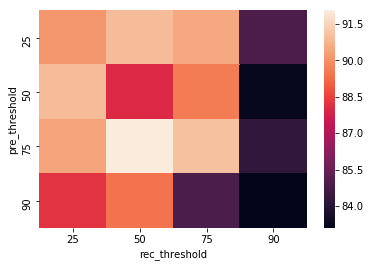

With instances sorted as True
With Early Stop set as False
rgb results:


,instances_sorted,early_stop,type,pre_threshold,rec_threshold,f1_score,precision,recall,accuracy,mean_max_dissim_,mean_min_dissim_,median_max_dissim_,median_min_dissim_,std_dev_max_dissim_,std_dev_min_dissim_
2,True,False,rgb,25,75,92.222222,90.152778,97.708333,92.006944,88.115495,9.667701,88.624766,5.731968,1.211540,12.793688
4,True,False,rgb,50,25,92.095238,89.909722,97.986111,92.416667,88.115495,9.015672,88.624766,5.731968,1.211540,11.627052
6,True,False,rgb,50,75,91.948413,90.145833,97.430556,92.201389,88.115495,9.667701,88.624766,5.731968,1.211540,12.793688
11,True,False,rgb,75,90,91.360119,89.131944,97.569444,91.888889,88.101162,23.803123,88.624766,11.186764,1.214243,27.169339
5,True,False,rgb,50,50,90.606151,88.034722,97.638889,91.027778,88.115495,9.015672,88.624766,5.731968,1.211540,11.627052
7,True,False,rgb,50,90,90.370040,87.131944,98.125000,90.895833,88.101162,23.495697,88.624766,11.186764,1.214243,26.975153
8,True,False,rgb,75,25,90.042659,86.583333,98.055556,90.250000,88.115495,10.798646,88.624766,5.731968,1.211540,13.557235
9,True,False,rgb,75,50,89.896825,86.097222,98.125000,90.402778,88.115495,10.798646,88.624766,5.731968,1.211540,13.557235
3,True,False,rgb,25,90,89.670635,86.493056,97.291667,91.020833,88.101162,23.495697,88.624766,11.186764,1.214243,26.975153
13,True,False,rgb,90,50,89.559524,86.583333,97.430556,90.451389,88.115495,32.912863,88.624766,11.749508,1.211540,32.002938


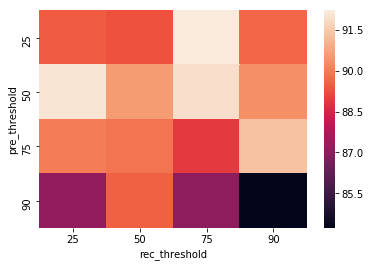

With instances sorted as False
With Early Stop set as True
rgb results:


,instances_sorted,early_stop,type,pre_threshold,rec_threshold,f1_score,precision,recall,accuracy,mean_max_dissim_,mean_min_dissim_,median_max_dissim_,median_min_dissim_,std_dev_max_dissim_,std_dev_min_dissim_
2,False,True,rgb,25,75,93.176587,92.847222,96.180556,94.270833,88.024405,9.254504,88.510142,5.731968,1.421968,11.497557
4,False,True,rgb,50,25,92.702381,91.666667,97.222222,92.743056,88.115495,9.015672,88.624766,5.731968,1.211540,11.627052
9,False,True,rgb,75,50,91.972222,90.402778,97.291667,92.416667,87.270668,9.894530,88.596109,5.731968,4.676950,11.709243
5,False,True,rgb,50,50,91.935516,90.166667,97.430556,91.743056,88.115495,9.015672,88.624766,5.731968,1.211540,11.627052
1,False,True,rgb,25,50,91.551587,89.513889,97.569444,91.756944,88.115495,9.015672,88.624766,5.731968,1.211540,11.627052
8,False,True,rgb,75,25,91.021825,88.555556,97.986111,91.402778,87.831214,13.937734,88.596109,5.731968,2.111384,17.529342
0,False,True,rgb,25,25,90.984127,88.576389,97.638889,90.868056,88.115495,9.015672,88.624766,5.731968,1.211540,11.627052
3,False,True,rgb,25,90,90.507937,87.437500,98.333333,90.659722,87.272538,19.665938,88.452826,10.217734,3.025808,23.300199
6,False,True,rgb,50,75,90.041667,86.680556,97.986111,90.493056,88.036672,12.509073,88.452826,5.731968,1.198352,19.593425
10,False,True,rgb,75,75,89.367063,85.312500,98.611111,89.965278,87.988515,13.041709,88.624766,5.731968,1.472812,17.189533


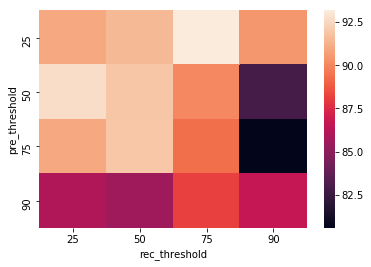

With instances sorted as False
With Early Stop set as False
rgb results:


,instances_sorted,early_stop,type,pre_threshold,rec_threshold,f1_score,precision,recall,accuracy,mean_max_dissim_,mean_min_dissim_,median_max_dissim_,median_min_dissim_,std_dev_max_dissim_,std_dev_min_dissim_
6,False,False,rgb,50,75,92.181548,90.013889,97.847222,92.479167,88.115495,9.015672,88.624766,5.731968,1.211540,11.627052
4,False,False,rgb,50,25,91.116071,88.895833,97.222222,92.090278,88.115495,9.015672,88.624766,5.731968,1.211540,11.627052
9,False,False,rgb,75,50,90.855159,88.541667,97.013889,91.694444,88.093929,9.015672,88.624766,5.731968,1.261402,11.627052
10,False,False,rgb,75,75,90.660714,89.145833,96.388889,90.625000,88.113107,9.436277,88.596111,5.731968,1.210364,11.636472
8,False,False,rgb,75,25,90.372024,87.645833,97.638889,90.875000,88.017231,9.936582,88.624766,5.731968,1.440332,12.454851
5,False,False,rgb,50,50,90.103175,88.145833,96.736111,90.159722,88.115495,9.015672,88.624766,5.731968,1.211540,11.627052
0,False,False,rgb,25,25,89.791667,86.486111,97.708333,90.368056,88.115495,9.015672,88.624766,5.731968,1.211540,11.627052
1,False,False,rgb,25,50,89.735119,86.326389,97.777778,89.923611,88.115495,9.015672,88.624766,5.731968,1.211540,11.627052
2,False,False,rgb,25,75,88.349206,84.972222,97.083333,88.763889,88.113099,9.621244,88.624766,5.731968,1.217724,11.519704
11,False,False,rgb,75,90,88.014881,83.173611,98.750000,88.930556,88.027038,17.745283,88.481484,7.446452,1.277019,22.377014


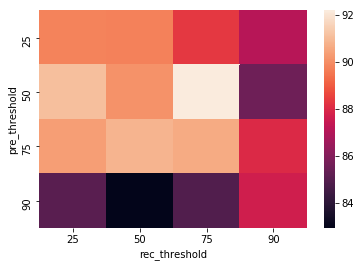

With instances sorted as True
With Early Stop set as True
shape results:


,instances_sorted,early_stop,type,pre_threshold,rec_threshold,f1_score,precision,recall,accuracy,mean_max_dissim_,mean_min_dissim_,median_max_dissim_,median_min_dissim_,std_dev_max_dissim_,std_dev_min_dissim_
12,True,True,shape,90,25,79.647619,87.791667,77.666667,84.933333,88.776525,1.71122,89.054577,0.0,0.67792,2.43799
14,True,True,shape,90,75,78.491667,84.550000,77.416667,82.908333,88.776525,1.71122,89.054577,0.0,0.67792,2.43799
0,True,True,shape,25,25,76.905952,83.341667,76.333333,84.341667,88.776525,1.71122,89.054577,0.0,0.67792,2.43799
1,True,True,shape,25,50,75.907143,82.666667,74.166667,83.900000,88.776525,1.71122,89.054577,0.0,0.67792,2.43799
9,True,True,shape,75,50,75.623810,81.333333,75.416667,84.258333,88.776525,1.71122,89.054577,0.0,0.67792,2.43799
11,True,True,shape,75,90,75.380952,82.791667,73.416667,83.166667,88.776525,1.71122,89.054577,0.0,0.67792,2.43799
7,True,True,shape,50,90,74.648810,81.716667,73.250000,80.950000,88.776525,1.71122,89.054577,0.0,0.67792,2.43799
5,True,True,shape,50,50,74.486905,79.591667,75.500000,81.766667,88.776525,1.71122,89.054577,0.0,0.67792,2.43799
15,True,True,shape,90,90,74.295238,81.375000,73.000000,83.408333,88.776525,1.71122,89.054577,0.0,0.67792,2.43799
8,True,True,shape,75,25,74.147619,81.208333,72.750000,82.508333,88.776525,1.71122,89.054577,0.0,0.67792,2.43799


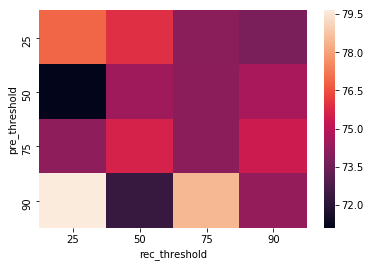

With instances sorted as True
With Early Stop set as False
shape results:


,instances_sorted,early_stop,type,pre_threshold,rec_threshold,f1_score,precision,recall,accuracy,mean_max_dissim_,mean_min_dissim_,median_max_dissim_,median_min_dissim_,std_dev_max_dissim_,std_dev_min_dissim_
0,True,False,shape,25,25,78.783333,88.166667,75.750000,82.458333,88.776525,1.71122,89.054577,0.0,0.67792,2.43799
7,True,False,shape,50,90,77.203571,81.341667,77.750000,83.275000,88.776525,1.71122,89.054577,0.0,0.67792,2.43799
11,True,False,shape,75,90,77.155952,84.675000,75.916667,82.750000,88.776525,1.71122,89.054577,0.0,0.67792,2.43799
5,True,False,shape,50,50,76.714286,85.208333,74.583333,81.616667,88.776525,1.71122,89.054577,0.0,0.67792,2.43799
3,True,False,shape,25,90,76.566667,85.333333,73.583333,84.891667,88.776525,1.71122,89.054577,0.0,0.67792,2.43799
6,True,False,shape,50,75,76.300000,82.500000,75.750000,82.758333,88.776525,1.71122,89.054577,0.0,0.67792,2.43799
13,True,False,shape,90,50,75.611905,81.708333,73.500000,83.533333,88.776525,1.71122,89.054577,0.0,0.67792,2.43799
1,True,False,shape,25,50,75.516667,84.000000,73.000000,83.175000,88.776525,1.71122,89.054577,0.0,0.67792,2.43799
15,True,False,shape,90,90,75.288095,82.808333,73.416667,83.066667,88.776525,1.71122,89.054577,0.0,0.67792,2.43799
2,True,False,shape,25,75,75.240476,82.000000,74.250000,84.458333,88.776525,1.71122,89.054577,0.0,0.67792,2.43799


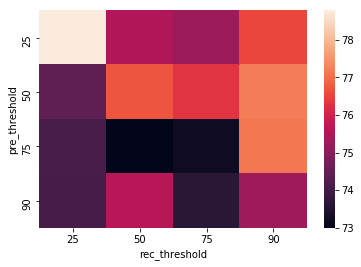

With instances sorted as False
With Early Stop set as True
shape results:


,instances_sorted,early_stop,type,pre_threshold,rec_threshold,f1_score,precision,recall,accuracy,mean_max_dissim_,mean_min_dissim_,median_max_dissim_,median_min_dissim_,std_dev_max_dissim_,std_dev_min_dissim_
3,False,True,shape,25,90,77.995238,84.541667,76.833333,84.825000,88.776525,1.71122,89.054577,0.0,0.67792,2.43799
15,False,True,shape,90,90,77.011905,83.458333,75.583333,84.283333,88.776525,1.71122,89.054577,0.0,0.67792,2.43799
6,False,True,shape,50,75,76.814286,83.625000,75.250000,83.691667,88.776525,1.71122,89.054577,0.0,0.67792,2.43799
1,False,True,shape,25,50,76.619048,84.750000,74.250000,85.150000,88.776525,1.71122,89.054577,0.0,0.67792,2.43799
7,False,True,shape,50,90,76.566667,84.000000,74.916667,83.358333,88.776525,1.71122,89.054577,0.0,0.67792,2.43799
4,False,True,shape,50,25,76.540476,84.500000,74.750000,83.275000,88.776525,1.71122,89.054577,0.0,0.67792,2.43799
9,False,True,shape,75,50,76.326190,81.541667,76.666667,84.058333,88.776525,1.71122,89.054577,0.0,0.67792,2.43799
2,False,True,shape,25,75,75.933333,85.416667,73.833333,81.183333,88.776525,1.71122,89.054577,0.0,0.67792,2.43799
0,False,True,shape,25,25,75.857143,83.083333,74.750000,83.200000,88.776525,1.71122,89.054577,0.0,0.67792,2.43799
12,False,True,shape,90,25,74.461905,82.875000,72.166667,82.558333,88.776525,1.71122,89.054577,0.0,0.67792,2.43799


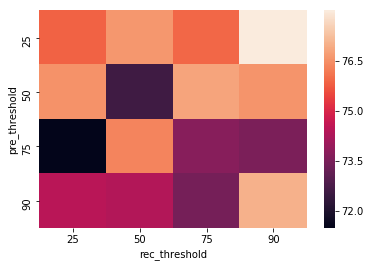

With instances sorted as False
With Early Stop set as False
shape results:


,instances_sorted,early_stop,type,pre_threshold,rec_threshold,f1_score,precision,recall,accuracy,mean_max_dissim_,mean_min_dissim_,median_max_dissim_,median_min_dissim_,std_dev_max_dissim_,std_dev_min_dissim_
13,False,False,shape,90,50,76.252381,82.833333,75.416667,83.116667,88.776525,1.71122,89.054577,0.0,0.67792,2.43799
0,False,False,shape,25,25,76.023810,82.333333,75.250000,83.158333,88.776525,1.71122,89.054577,0.0,0.67792,2.43799
6,False,False,shape,50,75,75.833333,82.750000,74.583333,81.725000,88.776525,1.71122,89.054577,0.0,0.67792,2.43799
5,False,False,shape,50,50,75.523810,79.916667,76.166667,81.691667,88.776525,1.71122,89.054577,0.0,0.67792,2.43799
15,False,False,shape,90,90,75.350000,83.208333,74.083333,79.316667,88.776525,1.71122,89.054577,0.0,0.67792,2.43799
7,False,False,shape,50,90,75.100000,84.333333,72.666667,82.583333,88.776525,1.71122,89.054577,0.0,0.67792,2.43799
11,False,False,shape,75,90,75.092857,84.166667,72.416667,80.833333,88.776525,1.71122,89.054577,0.0,0.67792,2.43799
4,False,False,shape,50,25,74.925000,80.466667,75.083333,81.533333,88.776525,1.71122,89.054577,0.0,0.67792,2.43799
1,False,False,shape,25,50,74.495238,81.541667,73.500000,82.458333,88.776525,1.71122,89.054577,0.0,0.67792,2.43799
10,False,False,shape,75,75,74.480952,81.458333,73.333333,82.941667,88.776525,1.71122,89.054577,0.0,0.67792,2.43799


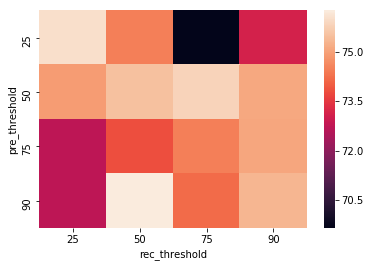

With instances sorted as True
With Early Stop set as True
object results:


,instances_sorted,early_stop,type,pre_threshold,rec_threshold,f1_score,precision,recall,accuracy,mean_max_dissim_,mean_min_dissim_,median_max_dissim_,median_min_dissim_,std_dev_max_dissim_,std_dev_min_dissim_
10,True,True,object,75,75,76.806548,85.065104,73.880208,83.135417,88.455581,2.4452,88.854008,0.0,1.085714,4.227836
12,True,True,object,90,25,76.430060,84.348958,73.723958,82.846354,88.455581,2.4452,88.854008,0.0,1.085714,4.227836
14,True,True,object,90,75,76.336310,84.531250,74.166667,83.151042,88.455581,2.4452,88.854008,0.0,1.085714,4.227836
0,True,True,object,25,25,76.111607,84.036458,73.776042,82.950521,88.455581,2.4452,88.854008,0.0,1.085714,4.227836
8,True,True,object,75,25,76.051339,82.742188,74.062500,83.385417,88.455581,2.4452,88.854008,0.0,1.085714,4.227836
11,True,True,object,75,90,75.845238,85.651042,72.135417,81.505208,88.455581,2.4452,88.854008,0.0,1.085714,4.227836
4,True,True,object,50,25,75.582589,84.257812,72.812500,82.578125,88.455581,2.4452,88.854008,0.0,1.085714,4.227836
6,True,True,object,50,75,75.558780,83.072917,73.125000,82.333333,88.455581,2.4452,88.854008,0.0,1.085714,4.227836
13,True,True,object,90,50,75.529390,85.328125,71.796875,81.875000,88.455581,2.4452,88.854008,0.0,1.085714,4.227836
5,True,True,object,50,50,75.174851,83.932292,72.317708,81.234375,88.455581,2.4452,88.854008,0.0,1.085714,4.227836


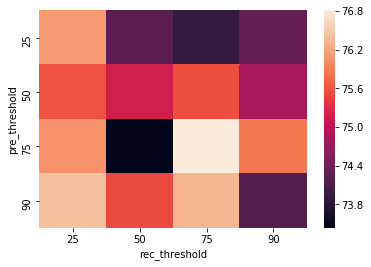

With instances sorted as True
With Early Stop set as False
object results:


,instances_sorted,early_stop,type,pre_threshold,rec_threshold,f1_score,precision,recall,accuracy,mean_max_dissim_,mean_min_dissim_,median_max_dissim_,median_min_dissim_,std_dev_max_dissim_,std_dev_min_dissim_
12,True,False,object,90,25,76.031250,83.919271,73.567708,83.687500,88.455581,2.4452,88.854008,0.0,1.085714,4.227836
2,True,False,object,25,75,75.863467,83.153646,73.697917,82.929687,88.455581,2.4452,88.854008,0.0,1.085714,4.227836
14,True,False,object,90,75,75.842262,82.447917,73.984375,82.856771,88.455581,2.4452,88.854008,0.0,1.085714,4.227836
7,True,False,object,50,90,75.769345,82.747396,74.036458,82.700521,88.455581,2.4452,88.854008,0.0,1.085714,4.227836
3,True,False,object,25,90,75.741071,83.906250,72.994792,82.549479,88.455581,2.4452,88.854008,0.0,1.085714,4.227836
13,True,False,object,90,50,75.716518,82.317708,74.479167,82.533854,88.455581,2.4452,88.854008,0.0,1.085714,4.227836
1,True,False,object,25,50,75.505952,83.268229,72.890625,83.403646,88.455581,2.4452,88.854008,0.0,1.085714,4.227836
15,True,False,object,90,90,75.502604,83.453125,73.072917,82.791667,88.455581,2.4452,88.854008,0.0,1.085714,4.227836
9,True,False,object,75,50,75.471726,83.541667,73.645833,82.109375,88.455581,2.4452,88.854008,0.0,1.085714,4.227836
10,True,False,object,75,75,75.405878,83.322917,72.656250,83.091146,88.455581,2.4452,88.854008,0.0,1.085714,4.227836


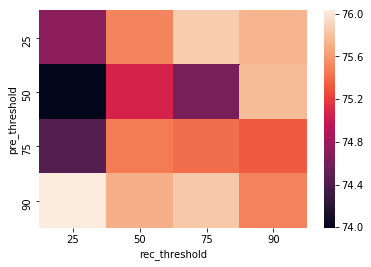

With instances sorted as False
With Early Stop set as True
object results:


,instances_sorted,early_stop,type,pre_threshold,rec_threshold,f1_score,precision,recall,accuracy,mean_max_dissim_,mean_min_dissim_,median_max_dissim_,median_min_dissim_,std_dev_max_dissim_,std_dev_min_dissim_
13,False,True,object,90,50,77.095610,85.757812,73.880208,83.794271,88.455581,2.4452,88.854008,0.0,1.085714,4.227836
7,False,True,object,50,90,76.029018,83.210938,74.401042,82.427083,88.455581,2.4452,88.854008,0.0,1.085714,4.227836
5,False,True,object,50,50,75.898810,83.033854,73.880208,83.382812,88.455581,2.4452,88.854008,0.0,1.085714,4.227836
8,False,True,object,75,25,75.743304,82.656250,74.244792,83.244792,88.455581,2.4452,88.854008,0.0,1.085714,4.227836
9,False,True,object,75,50,75.386161,83.398438,73.203125,82.559896,88.455581,2.4452,88.854008,0.0,1.085714,4.227836
0,False,True,object,25,25,75.192708,82.356771,73.385417,82.958333,88.455581,2.4452,88.854008,0.0,1.085714,4.227836
15,False,True,object,90,90,74.983631,82.395833,72.447917,83.421875,88.455581,2.4452,88.854008,0.0,1.085714,4.227836
11,False,True,object,75,90,74.907738,81.966146,72.578125,83.135417,88.455581,2.4452,88.854008,0.0,1.085714,4.227836
12,False,True,object,90,25,74.847470,82.929688,72.109375,82.591146,88.455581,2.4452,88.854008,0.0,1.085714,4.227836
2,False,True,object,25,75,74.802827,82.760417,72.161458,82.403646,88.455581,2.4452,88.854008,0.0,1.085714,4.227836


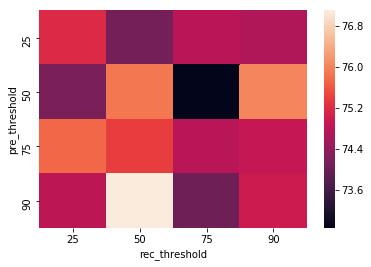

With instances sorted as False
With Early Stop set as False
object results:


,instances_sorted,early_stop,type,pre_threshold,rec_threshold,f1_score,precision,recall,accuracy,mean_max_dissim_,mean_min_dissim_,median_max_dissim_,median_min_dissim_,std_dev_max_dissim_,std_dev_min_dissim_
11,False,False,object,75,90,76.295387,84.049479,73.619792,83.622396,88.455581,2.4452,88.854008,0.0,1.085714,4.227836
6,False,False,object,50,75,76.190476,84.335938,73.567708,83.932292,88.455581,2.4452,88.854008,0.0,1.085714,4.227836
1,False,False,object,25,50,76.058780,84.192708,73.359375,83.140625,88.455581,2.4452,88.854008,0.0,1.085714,4.227836
4,False,False,object,50,25,75.886533,82.046875,74.817708,83.252604,88.455581,2.4452,88.854008,0.0,1.085714,4.227836
10,False,False,object,75,75,75.482887,82.408854,73.593750,82.750000,88.455581,2.4452,88.854008,0.0,1.085714,4.227836
3,False,False,object,25,90,75.166667,82.760417,72.708333,81.541667,88.455581,2.4452,88.854008,0.0,1.085714,4.227836
15,False,False,object,90,90,74.978423,82.747396,73.072917,82.455729,88.455581,2.4452,88.854008,0.0,1.085714,4.227836
2,False,False,object,25,75,74.729911,82.119792,73.177083,82.361979,88.455581,2.4452,88.854008,0.0,1.085714,4.227836
7,False,False,object,50,90,74.688988,83.046875,71.901042,83.023438,88.455581,2.4452,88.854008,0.0,1.085714,4.227836
13,False,False,object,90,50,74.531994,83.398438,71.770833,82.195312,88.455581,2.4452,88.854008,0.0,1.085714,4.227836


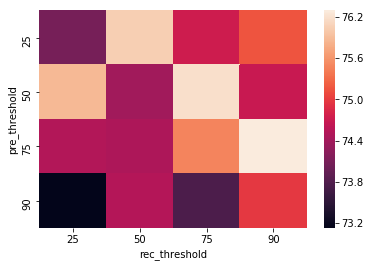

In [10]:
feature_types=["rgb","shape","object"]
early_stops=["True","False"]
instance_sorts=["True","False"]
All_Results=pd.DataFrame(Results.groupby(["instances_sorted",'early_stop','type','pre_threshold','rec_threshold']).mean().reset_index())
All_Results.to_csv("/Users/adithyabandi/Results.csv")
display()
for feature_type in feature_types:
    for instance_sort in instance_sorts:
        for early_stop in early_stops:
            print("With instances sorted as",instance_sort)
            print("With Early Stop set as",early_stop)
            print(feature_type,"results:")
            display_results(Results,feature_type,early_stop,instance_sort)